## Drop off rate Annalysis

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df_train = pd.read_csv(r"Patient_train.csv")
df_train.head(5)

,Unnamed: 0,Patient-Uid,Date,Incident
0,0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


### Extract only patients who have taken target drug atleast once

In [6]:
# Filter the dataframe based on the condition
filtered_df = df_train[df_train['Incident'] == 'TARGET DRUG']
patient_ids = filtered_df['Patient-Uid'].unique().tolist()
print(len(patient_ids))

9374


In [36]:
filtered_df[:5]

,Unnamed: 0,Patient-Uid,Date,Incident,Year,Month
0,12336688,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,2020,7
1,5863940,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,2020,8
2,11867225,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2020,9
3,22351865,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG,2018,4
4,21226200,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG,2018,5


In [ ]:
# lets find drop off rate and its graph

In [9]:
# Convert the 'Date' column to datetime format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Year'] = filtered_df['Date'].dt.year
filtered_df['Month'] = filtered_df['Date'].dt.month

In [37]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df[:2] 

,Unnamed: 0,Patient-Uid,Date,Incident,Year,Month
0,12336688,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,2020,7
1,5863940,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,2020,8


### This graph shows in a month how many patients taken target drug

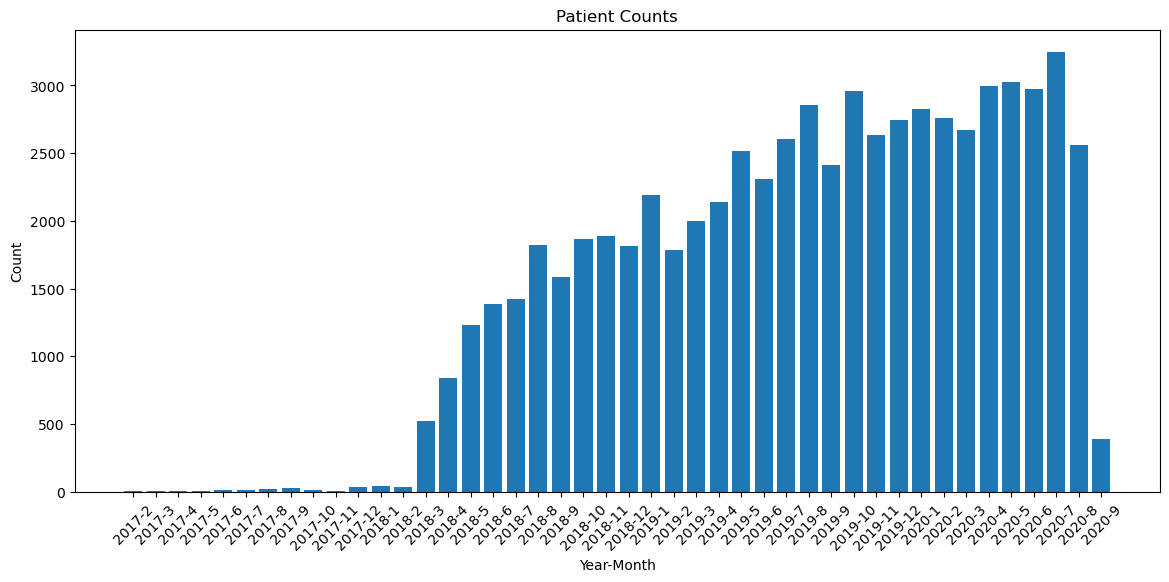

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
trend = filtered_df.groupby(['Year', 'Month'])
patient_counts = trend['Patient-Uid'].count()
x_labels = [f'{year}-{month}' for year, month in patient_counts.index]
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.8
plt.xticks(rotation=45)
ax.bar(x_labels, patient_counts, width=bar_width)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Count')
ax.set_title('Patient Counts')
plt.show()


In [57]:
# The monthly count of target drug is almost an upward curve, even though there are some drop offs which 
# are not acting as a major part


In [59]:
myl=list(patient_counts)
l=[]
l.append(0)
for i in range(len(myl)-1):
    if myl[i]>myl[i+1]:
        l.append(myl[i]-myl[i+1])
    else:
        l.append(0)
len(l)

44

In [44]:
# Get the group names
group_names = trend.groups.keys()
ya=[]
# Print the group names
for group_name in group_names:
    ya.append(group_name)
string_list = list(map(str, ya))
len(string_list)

44

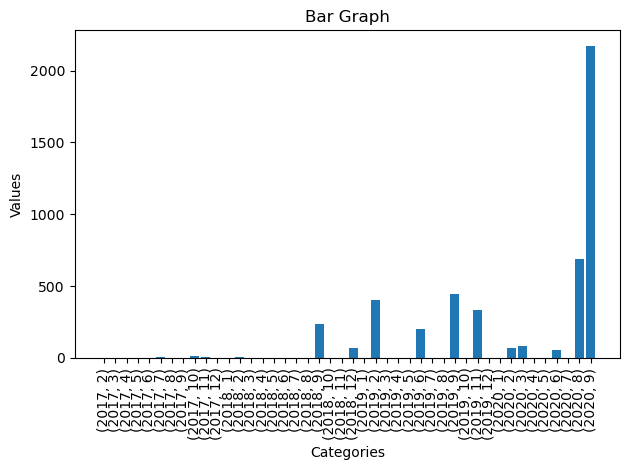

In [62]:
import matplotlib.pyplot as plt
plt.bar(string_list, l)
plt.title("Bar Graph")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# In the above figure we can see the drop off of particular months